# **Omdena Pakistan**  
# **Exploratory Data Analysis of Covid in Pakistan** 

Open Colab Link: https://colab.research.google.com/drive/1nTZrpFH8x4hz14cNwi4W1gfQ3Ylyc8os

Covid cases are highly incremental in Pakistan which has to be stopped or atleast decrease its significance, for which we need to learn from deep data insights present in past covid datasets. So, here our goal is to get usefull insights and hidden information from diffrent datasets relating covid in Pakistan.

In [ ]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Importing datasets
df = pd.read_csv('/covid_cases_analysis.csv')

# Case normalize column names
df.columns = df.columns.str.lower()

df.head(10).reset_index(drop=True).style.background_gradient(cmap='Greens')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,PAK,Asia,Pakistan,2020-03-18,454,155,62.000000,2.000000,2.000000,0.286000,2.016000,0.688000,0.275000,0.009000,0.009000,0.001000,2.360000,242.000000,0.001000,0.256000,3.900000,tests performed,52.780000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
1,PAK,Asia,Pakistan,2020-03-19,501,47,67.571000,3.000000,1.000000,0.429000,2.225000,0.209000,0.300000,0.013000,0.004000,0.002000,2.260000,411.000000,0.002000,0.164000,6.100000,tests performed,52.780000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
2,PAK,Asia,Pakistan,2020-03-20,730,229,99.857000,3.000000,0.000000,0.429000,3.242000,1.017000,0.443000,0.013000,0.000000,0.002000,2.180000,485.000000,0.002000,0.206000,4.900000,tests performed,52.780000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
3,PAK,Asia,Pakistan,2020-03-21,776,46,103.286000,5.000000,2.000000,0.714000,3.446000,0.204000,0.459000,0.022000,0.009000,0.003000,2.050000,649.000000,0.003000,0.159000,6.300000,tests performed,55.560000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
4,PAK,Asia,Pakistan,2020-03-22,875,99,105.571000,6.000000,1.000000,0.857000,3.885000,0.440000,0.469000,0.027000,0.004000,0.004000,1.940000,659.000000,0.003000,0.160000,6.200000,tests performed,55.560000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
5,PAK,Asia,Pakistan,2020-03-23,972,97,105.143000,7.000000,1.000000,1.000000,4.316000,0.431000,0.467000,0.031000,0.004000,0.004000,1.850000,676.000000,0.003000,0.156000,6.400000,tests performed,85.190000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
6,PAK,Asia,Pakistan,2020-03-24,1063,91,109.143000,8.000000,1.000000,1.143000,4.720000,0.404000,0.485000,0.036000,0.004000,0.005000,1.800000,712.000000,0.003000,0.153000,6.500000,tests performed,93.520000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
7,PAK,Asia,Pakistan,2020-03-25,1201,138,106.714000,9.000000,1.000000,1.000000,5.333000,0.613000,0.474000,0.040000,0.004000,0.004000,1.750000,612.000000,0.003000,0.174000,5.700000,tests performed,93.520000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
8,PAK,Asia,Pakistan,2020-03-26,1373,172,124.571000,11.000000,2.000000,1.143000,6.097000,0.764000,0.553000,0.049000,0.009000,0.005000,1.730000,632.000000,0.003000,0.197000,5.100000,tests performed,96.300000,225199929,255.573000,23.500000,4.495000,2.780000,5034.708000,4,423.031000,8.350000,2.800000,36.700000,59.607000,0.600000,67.270000,0.557000
9,PAK,Asia,Pakistan,2020-03-27,1495,122,109.286000,12.000000,1.000000,1.286000,6.639000,0.542000,0.485000,0.053000,0.004000,0.006000,1.680000,1319.000000,0.006000,0.083000,12.100000,tests performed,96.300000,225199929,255.573000,23.500000,4.4950

In [ ]:
print('Dataset shape :',df.shape)

print('Dataset column length :',len(df.columns), '\n\n',df.columns)

Dataset shape : (577, 38)
Dataset column length : 38 

 Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')


In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,5.770000e+02,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.0,5.770000e+02,577.0,5.770000e+02,5.770000e+02,5.770000e+02,577.0,5.770000e+02,577.00,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02,5.770000e+02
mean,5.484714e+05,2181.351820,2177.275303,12035.958406,48.755633,48.669241,2435.486357,9.686282,9.668185,53.445666,0.216511,0.216137,1.057244,34559.750433,0.153442,0.070936,21.736568,62.996620,225199929.0,2.555730e+02,23.5,4.495000e+00,2.780000e+00,5.034708e+03,4.0,4.230310e+02,8.35,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01
std,3.769099e+05,1622.185839,1482.201207,8583.251353,38.953064,33.007528,1673.668038,7.203309,6.581704,38.113930,0.172975,0.146560,0.248207,15325.425242,0.068049,0.048825,14.471362,13.403107,0.0,1.507658e-12,0.0,6.400433e-14,2.222373e-14,6.098902e-11,0.0,4.494527e-12,0.00,2.844637e-14,3.911376e-13,1.564550e-13,3.000203e-15,1.706782e-13,8.889491e-16
min,4.540000e+02,0.000000,62.000000,2.000000,0.000000,0.286000,2.016000,0.000000,0.275000,0.009000,0.000000,0.001000,0.650000,242.000000,0.001000,0.015000,3.900000,37.500000,225199929.0,2.555730e+02,23.5,4.495000e+00,2.780000e+00,5.034708e+03,4.0,4.230310e+02,8.35,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01
25%,2.841210e+05,893.000000,934.714000,6082.000000,18.000000,22.429000,1261.639000,3.965000,4.151000,27.007000,0.080000,0.100000,0.870000,23469.000000,0.104000,0.034000,11.100000,53.240000,225199929.0,2.555730e+02,23.5,4.495000e+00,2.780000e+00,5.034708e+03,4.0,4.230310e+02,8.35,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01
50%,4.821780e+05,1808.000000,1886.286000,10176.000000,42.000000,45.571000,2141.111000,8.028000,8.376000,45.187000,0.187000,0.202000,1.010000,37665.000000,0.167000,0.060000,16.800000,63.430000,225199929.0,2.555730e+02,23.5,4.495000e+00,2.780000e+00,5.034708e+03,4.0,4.230310e+02,8.35,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01
75%,9.085760e+05,3138.000000,3210.000000,20465.000000,70.000000,73.000000,4034.531000,13.934000,14.254000,90.875000,0.311000,0.324000,1.230000,45341.000000,0.201000,0.090000,29.300000,66.670000,225199929.0,2.555730e+02,23.5,4.495000e+00,2.780000e+00,5.034708e+03,4.0,4.230310e+02,8.35,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01
max,1.264384e+06,12073.000000,6533.286000,28269.000000,313.000000,140.286000,5614.496000,53.610000,29.011000,125.528000,1.390000,0.623000,2.360000,63220.000000,0.281000,0.256000,68.700000,96.300000,225199929.0,2.555730e+02,23.5,4.495000e+00,2.780000e+00,5.034708e+03,4.0,4.230310e+02,8.35,2.800000e+00,3.670000e+01,5.960700e+01,6.000000e-01,6.727000e+01,5.570000e-01


### **Checking null values**

In [ ]:
# columns with null values
nullValuesLists= [features for features in df.columns if df[features].isnull().sum()>1] 

for features in nullValuesLists:
    print(features, 'column have',(np.round(df[features].isnull().mean(),4))*100, "% missing data")

No null values.

### **Finding temporary columns**

In [ ]:
#converting date columns to datetime
df['date'] =  pd.to_datetime(df['date'])

#Find temporary features

tempFeaturses =[features for features in df if 'date' in features.lower()]
for i in tempFeaturses:
    print('Available data for :', len(df[i].unique()),'days')

Available data for : 577 days


### **Finding categorical columns**

In [ ]:
# Seperate the categorical columns
categorical_cols = df.select_dtypes('object').columns
print(len(categorical_cols),"Categorical Features")

4 Categorical Features


In [ ]:
categorical_cols

Index(['iso_code', 'continent', 'location', 'tests_units'], dtype='object')

### **Finding Numerical columns**

In [ ]:
# finding Numerical Data

numData = [features for features in df.columns if df[features].dtype !='O'] # object represents string
print(len(numData),"Numerical Features")

34 Numerical Features


In [ ]:
numData

['date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'stringency_index',
 'population',
 'population_density',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'diabetes_prevalence',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds_per_thousand',
 'life_expectancy',
 'human_development_index']

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'].head(35), y = df['total_cases'].head(35), mode='lines+markers',name='total_cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in Pakistan',plot_bgcolor='rgb(230, 230, 230)', xaxis_title="Date", yaxis_title="Cases")
fig.show()

fig = px.bar(df, x="date", y="new_cases_smoothed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in Pakistan on daily basis',plot_bgcolor='rgb(230, 230, 230)',xaxis_title="Date", yaxis_title="New daily cases")

fig.show()

In [ ]:
px.bar(df.sort_values('total_cases', ascending=True),
       y="total_cases", 
       x="new_deaths_smoothed",
       labels={"total_cases":"NewCases","new_deaths_smoothed":"Deaths"}, 
       title="Deaths per million cases",
       orientation='v')

In [ ]:
fig = px.bar(df, x="date", y="new_tests_smoothed", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus test Cases in Pakistan on daily basis',plot_bgcolor='rgb(230, 230, 230)',xaxis_title="Date", yaxis_title="Covid tests on daily bases")

fig.show()

In [ ]:
fig = px.bar(df, x="date", y="total_cases", color='total_cases', orientation='v', height=600,
             title='Confirmed Cases in Pakistan', color_discrete_sequence = px.colors.cyclical.IceFire,labels={"total_cases":"Cases","date":"Date"},)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

As these trends are perfect example of exponential growth of this pandemic. These bars looks like that we are heading towards bad situation.

In [ ]:
fig = px.bar(df, x="date", y="reproduction_rate", color='reproduction_rate', orientation='v', height=600,
             title='Reproduction Rate in Pakistan', color_discrete_sequence = px.colors.cyclical.IceFire,labels={"reproduction_rate":"Reproduction rate","date":"Date"},)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

Reproduction Rate in Pakistan was expected to increase significantly but here its proven wrong it decreased.

In [ ]:
temp = df.groupby(['date'])['new_cases','new_tests_smoothed','new_deaths'].sum().reset_index()
fig = px.scatter(temp, x="date", y="new_cases", color="new_cases",
                 size='new_cases', hover_data=['new_cases'],
                 color_discrete_sequence = ex.colors.cyclical.IceFire)
fig.update_layout(title_text='Trend of Daily Cases in Pakistan',
                  plot_bgcolor='rgb(275, 270, 273)',width=800, height=800,xaxis_title="Date", yaxis_title="Covid Cases")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['date'], y=df['total_cases'],
                    mode='lines+markers',marker_color='blue',name='Confimned Cases'))
fig.add_trace(go.Scatter(x=df['date'], y=df['new_tests_smoothed'],
                mode='lines+markers',marker_color='green',name='Tests'))
fig.add_trace(go.Scatter(x=df['date'], y=df['total_deaths'], 
                mode='lines+markers',marker_color='red',name='Deaths'))
fig.update_layout(title_text='Coronavirus Cases in Pakistan',plot_bgcolor='rgb(275, 270, 273)',width=600, height=600)
fig.show()

In [ ]:
map_data = df[['province','latitude','longitude','deaths']]
map_data

,Province,latitude,longitude,deaths
0,Sindh,26.009446,68.776807,3582.0
1,Sindh,26.009446,68.776807,3594.0
2,Sindh,26.009446,68.776807,3611.0
3,Sindh,26.009446,68.776807,3623.0
4,Sindh,26.009446,68.776807,3634.0
...,...,...,...,...
3579,Gilgit-Baltistan,35.792146,74.982138,101.0
3580,Gilgit-Baltistan,35.792146,74.982138,101.0
3581,Gilgit-Baltistan,35.792146,74.982138,101.0
3582,Gilgit-Baltistan,35.792146,74.982138,101.0


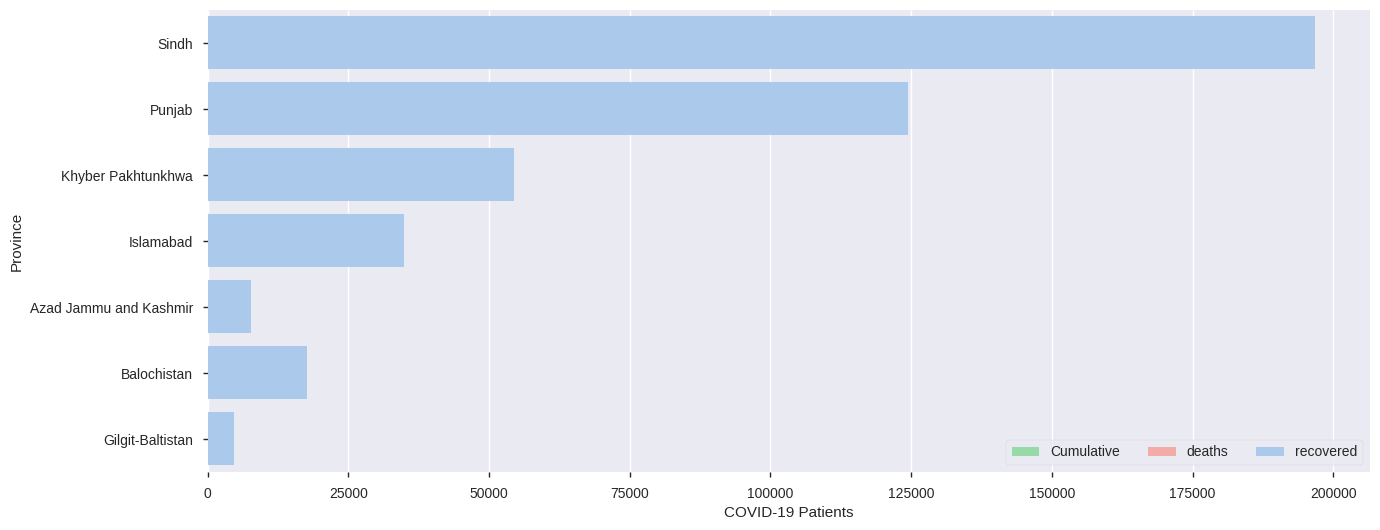

In [ ]:
# Sub-dataframe: day
day = df[df['updated_dates'] == '2021-01-03']

# Sub-dataframe: subdf1
subdf = day.groupby(['Province'
                      ]).sum().sort_values(by='active',
                                           ascending=False).copy()

subdf = subdf.iloc[:10]

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15,6))

#plot the confirmed cases
sns.set_color_codes('pastel')
sns.barplot(x='active',
            y=subdf.index,
            data=subdf,
            label='Cumulative',
            color='g'
           )

# plot the cases that lead to death
sns.set_color_codes('pastel')
sns.barplot(x='deaths',
            y=subdf.index,
            data=subdf,
            label='deaths',
            color='r'
           )

# plot the cases that lead to recovery
sns.set_color_codes('pastel')
sns.barplot(x='recovered',
            y=subdf.index,
            data=subdf,
            label='recovered',
            color='b'
           )

# Add a legend and informative axis label
ax.legend(ncol=3, loc='lower right', frameon=True)
ax.set(xlabel='COVID-19 Patients')
sns.despine(left=True, bottom=True)

In [ ]:
fig = px.density_mapbox(map_data, lat= 'latitude', lon = 'longitude', z = 'deaths', radius=10, center = dict(lat=30,lon=75), zoom = 4 , hover_name="Province",
                        mapbox_style='stamen-watercolor',title= 'Province wise fatality')
fig.show()

According to the information we gathered, We can predict that covid cases in Pakistan will increase at very high rate as it had raised in past.This pandemic can be lethal if the authority and people of Pakistan didn't take serious steps.

Stay safe, and keep social distancing maintained!